In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, date

sys=pd.read_csv('SYS1.csv')
usd=pd.read_csv('USD1.csv')
sys.set_index('Date', inplace=True)

df= pd.merge(sys, usd, on='Date', how='left', suffixes=('_S','_D'))  
# Reverse rows using iloc() Function
df = df.iloc[::-1]
df.ffill(axis = 0)
df

,Date,Price_S,Open_S,High_S,Low_S,Vol._S,Change %_S,Price_D,Open_D,High_D,Low_D,Vol._D,Change %_D
1004,01/01/2019,89.83,90.80,90.91,89.30,14.64K,-1.07%,139.800,139.800,139.800,139.800,0.11K,0.00%
1003,01/03/2019,87.93,86.94,87.93,86.94,2.66K,-2.12%,139.850,139.850,140.040,138.350,1.50K,0.00%
1002,01/04/2019,87.93,90.08,90.08,90.08,0.12K,0.00%,139.850,139.850,140.000,135.370,1.92K,0.00%
1001,01/07/2019,88.43,88.43,88.60,88.40,123.18K,0.57%,139.850,139.850,140.000,138.400,0.05K,0.00%
1000,01/08/2019,88.87,88.43,90.91,88.41,38.24K,0.50%,139.875,139.825,139.975,138.365,0.16K,0.02%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,01/13/2023,494.63,496.00,499.95,486.00,332.39K,-0.68%,228.600,228.665,228.925,228.000,0.48K,0.12%
3,01/16/2023,489.50,497.98,497.99,484.50,250.61K,-1.04%,228.750,228.800,228.925,228.425,0.52K,0.07%
2,01/17/2023,463.48,490.89,491.00,451.62,1.04M,-5.32%,229.000,228.875,229.510,228.525,0.55K,0.11%
1,01/18/2023,479.99,458.20,484.00,458.20,499.57K,3.56%,229.250,229.500,229.635,228.750,0.53K,0.11%


In [ ]:
df1= df[['Date','Price_S','Open_S','High_S','Low_S','Vol._S', 'Price_D']].copy()
df1

,Date,Price_S,Open_S,High_S,Low_S,Vol._S,Price_D
1004,01/01/2019,89.83,90.80,90.91,89.30,14.64K,139.800
1003,01/03/2019,87.93,86.94,87.93,86.94,2.66K,139.850
1002,01/04/2019,87.93,90.08,90.08,90.08,0.12K,139.850
1001,01/07/2019,88.43,88.43,88.60,88.40,123.18K,139.850
1000,01/08/2019,88.87,88.43,90.91,88.41,38.24K,139.875
...,...,...,...,...,...,...,...
4,01/13/2023,494.63,496.00,499.95,486.00,332.39K,228.600
3,01/16/2023,489.50,497.98,497.99,484.50,250.61K,228.750
2,01/17/2023,463.48,490.89,491.00,451.62,1.04M,229.000
1,01/18/2023,479.99,458.20,484.00,458.20,499.57K,229.250


In [ ]:
#convert 'K','M' and 'B' to absolute values 
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

df1['Vol._S'] = df1['Vol._S'].apply(value_to_float)

df1

,Date,Price_S,Open_S,High_S,Low_S,Vol._S,Price_D
1004,01/01/2019,89.83,90.80,90.91,89.30,14640.0,139.800
1003,01/03/2019,87.93,86.94,87.93,86.94,2660.0,139.850
1002,01/04/2019,87.93,90.08,90.08,90.08,120.0,139.850
1001,01/07/2019,88.43,88.43,88.60,88.40,123180.0,139.850
1000,01/08/2019,88.87,88.43,90.91,88.41,38240.0,139.875
...,...,...,...,...,...,...,...
4,01/13/2023,494.63,496.00,499.95,486.00,332390.0,228.600
3,01/16/2023,489.50,497.98,497.99,484.50,250610.0,228.750
2,01/17/2023,463.48,490.89,491.00,451.62,1040000.0,229.000
1,01/18/2023,479.99,458.20,484.00,458.20,499570.0,229.250


In [ ]:
df1.set_index('Date', inplace=True)
print(df1)

            Price_S  Open_S  High_S   Low_S     Vol._S  Price_D
Date                                                           
01/01/2019    89.83   90.80   90.91   89.30    14640.0  139.800
01/03/2019    87.93   86.94   87.93   86.94     2660.0  139.850
01/04/2019    87.93   90.08   90.08   90.08      120.0  139.850
01/07/2019    88.43   88.43   88.60   88.40   123180.0  139.850
01/08/2019    88.87   88.43   90.91   88.41    38240.0  139.875
...             ...     ...     ...     ...        ...      ...
01/13/2023   494.63  496.00  499.95  486.00   332390.0  228.600
01/16/2023   489.50  497.98  497.99  484.50   250610.0  228.750
01/17/2023   463.48  490.89  491.00  451.62  1040000.0  229.000
01/18/2023   479.99  458.20  484.00  458.20   499570.0  229.250
01/19/2023   485.10  481.99  488.00  480.00   254860.0  229.850

[1005 rows x 6 columns]


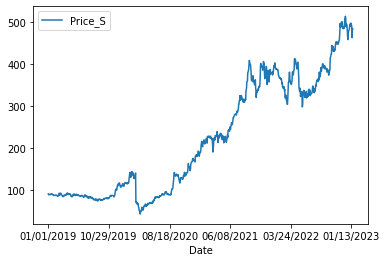

In [ ]:
# Visualize  stock prices
df1.plot.line(y="Price_S", use_index=True)

In [ ]:
data= df1[['Price_S']]
data

,Price_S
Date,
01/01/2019,89.83
01/03/2019,87.93
01/04/2019,87.93
01/07/2019,88.43
01/08/2019,88.87
...,...
01/13/2023,494.63
01/16/2023,489.50
01/17/2023,463.48


In [ ]:
# Ensure we know the actual  price
data = df1[["Price_S"]]
data = data.rename(columns = {'Price_S':'Actual_Price'})

# Setup our target.  This identifies if the price went up or down
data["Target"] = df1.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Price_S"]

In [ ]:
data["Target"].value_counts()

1.0    539
0.0    465
Name: Target, dtype: int64

In [ ]:
nan_count=(data.isna().sum())
print(nan_count)
print(data)

Actual_Price    0
Target          1
dtype: int64
            Actual_Price  Target
Date                            
01/01/2019         89.83     NaN
01/03/2019         87.93     0.0
01/04/2019         87.93     0.0
01/07/2019         88.43     1.0
01/08/2019         88.87     1.0
...                  ...     ...
01/13/2023        494.63     0.0
01/16/2023        489.50     0.0
01/17/2023        463.48     0.0
01/18/2023        479.99     1.0
01/19/2023        485.10     1.0

[1005 rows x 2 columns]


In [ ]:
# Shift stock prices forward one day, so we're predicting tomorrow's stock prices from today's prices.
df1 = df1.copy()
df1 = df1.shift(1)
# Create our training data
predictors = ["Price_S", "Vol._S", "Open_S", "High_S", "Low_S","Price_D"]
data = data.join(df1[predictors]).iloc[1:]

In [ ]:
data

,Actual_Price,Target,Price_S,Vol._S,Open_S,High_S,Low_S,Price_D
Date,,,,,,,,
01/03/2019,87.93,0.0,89.83,14640.0,90.80,90.91,89.30,139.800
01/04/2019,87.93,0.0,87.93,2660.0,86.94,87.93,86.94,139.850
01/07/2019,88.43,1.0,87.93,120.0,90.08,90.08,90.08,139.850
01/08/2019,88.87,1.0,88.43,123180.0,88.43,88.60,88.40,139.850
01/09/2019,89.20,1.0,88.87,38240.0,88.43,90.91,88.41,139.875
...,...,...,...,...,...,...,...,...
01/13/2023,494.63,0.0,498.00,736600.0,499.85,511.00,495.03,228.330
01/16/2023,489.50,0.0,494.63,332390.0,496.00,499.95,486.00,228.600
01/17/2023,463.48,0.0,489.50,250610.0,497.98,497.99,484.50,228.750


In [ ]:
data=data.dropna()
nan_count1= (data.isna().sum())
print(nan_count1)

Actual_Price    0
Target          0
Price_S         0
Vol._S          0
Open_S          0
High_S          0
Low_S           0
Price_D         0
dtype: int64


In [ ]:
data

,Actual_Price,Target,Price_S,Vol._S,Open_S,High_S,Low_S,Price_D
Date,,,,,,,,
01/03/2019,87.93,0.0,89.83,14640.0,90.80,90.91,89.30,139.800
01/04/2019,87.93,0.0,87.93,2660.0,86.94,87.93,86.94,139.850
01/07/2019,88.43,1.0,87.93,120.0,90.08,90.08,90.08,139.850
01/08/2019,88.87,1.0,88.43,123180.0,88.43,88.60,88.40,139.850
01/09/2019,89.20,1.0,88.87,38240.0,88.43,90.91,88.41,139.875
...,...,...,...,...,...,...,...,...
01/13/2023,494.63,0.0,498.00,736600.0,499.85,511.00,495.03,228.330
01/16/2023,489.50,0.0,494.63,332390.0,496.00,499.95,486.00,228.600
01/17/2023,463.48,0.0,489.50,250610.0,497.98,497.99,484.50,228.750


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create a random forest classification model.  Set min_samples_split high to ensure we don't overfit.
model = RandomForestClassifier(n_estimators=100,min_samples_split=200, random_state=1)

# Create a train and test set
train = data.iloc[:-100]
test = data.iloc[-100:]

model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=200, random_state=1)

In [ ]:
from sklearn.metrics import precision_score

# Evaluate error of predictions
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.6363636363636364

In [ ]:
preds

Date
09/01/2022    0.0
09/02/2022    0.0
09/05/2022    0.0
09/06/2022    0.0
09/07/2022    0.0
             ... 
01/13/2023    0.0
01/16/2023    0.0
01/17/2023    0.0
01/18/2023    0.0
01/19/2023    0.0
Length: 100, dtype: float64

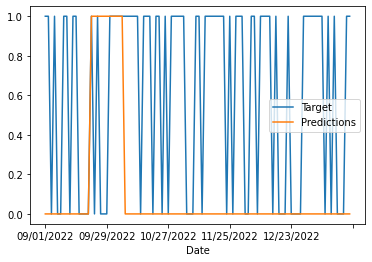

In [ ]:
combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)
combined.plot()

In [ ]:
combined

,Target,Predictions
Date,,
09/01/2022,1.0,0.0
09/02/2022,1.0,0.0
09/05/2022,0.0,0.0
09/06/2022,1.0,0.0
09/07/2022,0.0,0.0
...,...,...
01/13/2023,0.0,0.0
01/16/2023,0.0,0.0
01/17/2023,0.0,0.0


In [ ]:
data

,Actual_Price,Target,Price_S,Vol._S,Open_S,High_S,Low_S,Price_D
Date,,,,,,,,
01/03/2019,87.93,0.0,89.83,14640.0,90.80,90.91,89.30,139.800
01/04/2019,87.93,0.0,87.93,2660.0,86.94,87.93,86.94,139.850
01/07/2019,88.43,1.0,87.93,120.0,90.08,90.08,90.08,139.850
01/08/2019,88.87,1.0,88.43,123180.0,88.43,88.60,88.40,139.850
01/09/2019,89.20,1.0,88.87,38240.0,88.43,90.91,88.41,139.875
...,...,...,...,...,...,...,...,...
01/13/2023,494.63,0.0,498.00,736600.0,499.85,511.00,495.03,228.330
01/16/2023,489.50,0.0,494.63,332390.0,496.00,499.95,486.00,228.600
01/17/2023,463.48,0.0,489.50,250610.0,497.98,497.99,484.50,228.750


In [ ]:

def backtest(data, model, predictors, start=100, step=1):
    predictions = []
    # Loop over the dataset in increments
    for i in range(start, data.shape[0], step):
        # Split into train and test sets
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        
        # Fit the random forest model
        model.fit(train[predictors], train["Target"])
        
        # Make predictions
        preds = model.predict_proba(test[predictors])[:,1]
        preds = pd.Series(preds, index=test.index)
        preds[preds > .6] = 1
        preds[preds<=.6] = 0
        
        # Combine predictions and test values
        combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)
        
        predictions.append(combined)
    
    return pd.concat(predictions)

In [ ]:
predictions

,Target,Predictions
Date,,
11/19/2020,0.0,0.0
11/20/2020,0.0,0.0
11/23/2020,0.0,0.0
11/24/2020,1.0,0.0
11/25/2020,1.0,0.0
...,...,...
01/13/2023,0.0,0.0
01/16/2023,0.0,0.0
01/17/2023,0.0,0.0


In [ ]:
predictions["Predictions"].value_counts()

0.0    492
1.0     46
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5

In [ ]:
weekly_mean = data.rolling(7).mean()
quarterly_mean = data.rolling(90).mean()
annual_mean = data.rolling(365).mean()
weekly_trend = data.shift(1).rolling(7).mean()["Target"]

In [ ]:
data["weekly_mean"] = weekly_mean["Price_S"] / data["Price_S"]
data["quarterly_mean"] = quarterly_mean["Price_S"] / data["Price_S"]
data["annual_mean"] = annual_mean["Price_S"] / data["Price_S"]

data["annual_weekly_mean"] = data["annual_mean"] / data["weekly_mean"]
data["annual_quarterly_mean"] = data["annual_mean"] / data["quarterly_mean"]
data["weekly_trend"] = weekly_trend

data["open_close_ratio"] = data["Open_S"] / data["Price_S"]
data["high_close_ratio"] = data["High_S"] / data["Price_S"]
data["low_close_ratio"] = data["Low_S"] / data["Price_S"]

<ipython-input-360-9a4e2c695529>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["weekly_mean"] = weekly_mean["Price_S"] / data["Price_S"]
<ipython-input-360-9a4e2c695529>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["quarterly_mean"] = quarterly_mean["Price_S"] / data["Price_S"]
<ipython-input-360-9a4e2c695529>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [ ]:
full_predictors = predictors + ["weekly_mean", "quarterly_mean", "annual_mean", "annual_weekly_mean", "annual_quarterly_mean", "open_close_ratio", "high_close_ratio", "low_close_ratio", "weekly_trend"]
predictions = backtest(data.iloc[365:], model, full_predictors)

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5365853658536586

In [ ]:
# Show how many trades we would make

predictions["Predictions"].value_counts()

0.0    497
1.0     41
Name: Predictions, dtype: int64

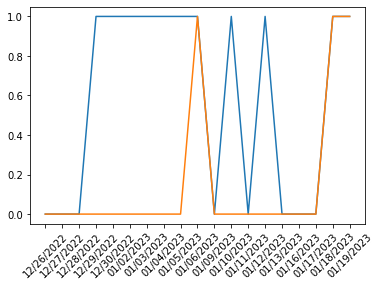

In [ ]:
import matplotlib.pyplot as plt
plt.plot(predictions.iloc[-19:])
plt.xticks(rotation = 45)
plt.show()